In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

Data = pd.read_csv("cadata.txt", sep=" ", header=None)

In [2]:
from sklearn import datasets
dataset = datasets.fetch_california_housing(as_frame = True)
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

In [4]:
Data.shape
colnames=["MedianHouseVal", "MedianIncome", "MedianHousingAge", "RoomsTot", "BedsTot", "Pop", "Households", "Lat", "Long"]
Data = Data.set_axis(colnames, axis=1, inplace=False)
headers = list(Data.columns.values)
headers


Data = Data.astype(str)
for c in colnames[1:]:
    Data[c] = pd.to_numeric(Data[c].str[2:])
Data = Data.astype(float)

In [5]:
# Data.describe()
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedianHouseVal    20640 non-null  float64
 1   MedianIncome      20640 non-null  float64
 2   MedianHousingAge  20640 non-null  float64
 3   RoomsTot          20640 non-null  float64
 4   BedsTot           20640 non-null  float64
 5   Pop               20640 non-null  float64
 6   Households        20640 non-null  float64
 7   Lat               20640 non-null  float64
 8   Long              20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
dat = Data.to_numpy()
A_unsplit = dat[:, 1:]
y_unsplit = MakeCol( dat[:, 0])  #We'll attempt to predict the median house-value

np.savetxt('dataPart1.txt', dat)

In [7]:
#Train-Test Split
p = 0.8
c = random.choices( [1,0] , weights=[p, 1-p], k=len(dat))
c = MakeCol(np.array(c))

I1 = find(c==1) # train
I0 = find(c==0) # test
A = A_unsplit[I1, :]
y = y_unsplit[I1]
A1 = A_unsplit[I0, :]
y1 = y_unsplit[I0]

In [8]:
[n,p] = A.shape
print(n,p)

16597 8


In [9]:
meanA = A.mean(axis=0)
stdA = A.std(axis=0)
A = (A-meanA)/stdA
A1 = (A1-meanA)/stdA

Remove the mean (computed from the *test* set) to avoid introducing a bias term and a constant regressor.
This is optional.

In [10]:
m = y.mean()
s = y.std()
y = (y-m)/s
y1 = (y1-m)/s

Display covariance

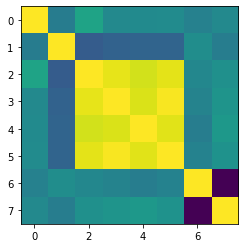

In [11]:
C = A.transpose().dot(A)
plt.imshow(C)
temp = [A, A1]

Remove features that don't help. PCA/SVD actually needs to be done here

16597 4


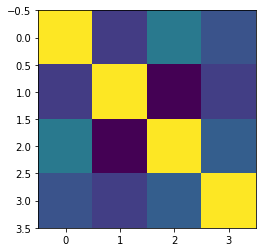

In [12]:
C = A[: , [0, 1, 2, 7]].transpose().dot(A[: , [0, 1, 2, 7]])
plt.imshow(C)

A = (temp[0])[: , [0, 1, 2, 7]]
A1 = (temp[1])[: , [0, 1, 2, 7]]

[n,p] = A.shape
print(n,p)

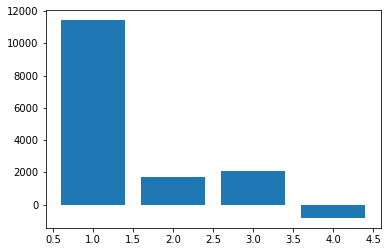

In [13]:
# [n, p] = A.shape

u = A.transpose().dot(y)
plt.clf
plt.bar(np.arange(1,p+1),u.flatten())
plt.axis('tight');

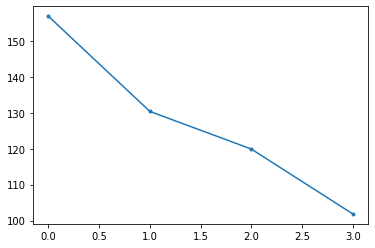

In [14]:
U, s, V = np.linalg.svd(A)
Ar = A.dot( V.transpose() )
plt.plot(s, '.-')

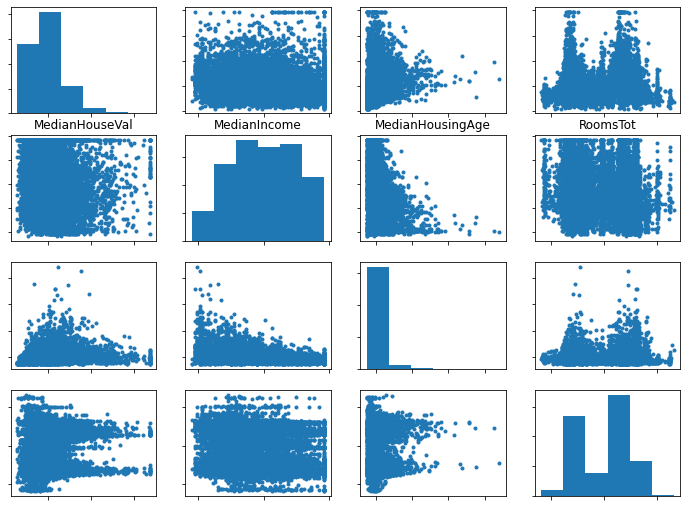

In [15]:
pmax = min(p,14)
k = 0
plt.clf
plt.rcParams["figure.figsize"] = (12,9)
fig = plt.figure()
fig.patch.set_facecolor('white')
for i in np.arange(0,pmax):
    for j in np.arange(0,pmax):
        k = k+1
        plt.subplot(pmax,pmax,k)
        if i==j:
            plt.hist(A[:,i],6)
            plt.axis('tight')
        else:
            plt.plot(A[:,j],A[:,i], '.')
        plt.axis('tight')
        if i==1:
            plt.title(headers[j])
        plt.tick_params(axis='x', labelbottom=False)
        plt.tick_params(axis='y', labelleft=False)


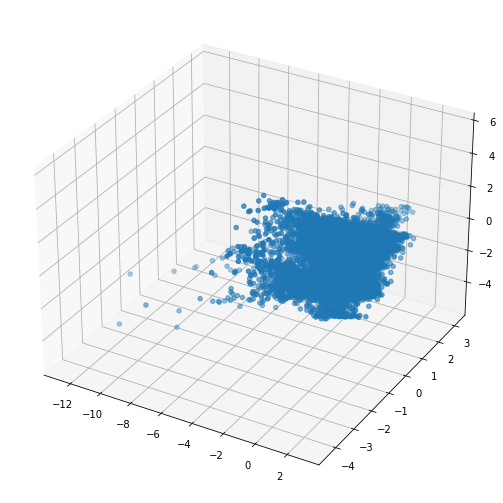

In [16]:
#Display points cloud of feature vectors in 2D PCA Space
# plt.plot(Ar[:,0], Ar[:,1], '.')
# plt.axis('equal');

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.rcParams["figure.figsize"] = (12,9)
fig.patch.set_facecolor('white')
ax.scatter3D(Ar[:,0], Ar[:,1], Ar[:,2])

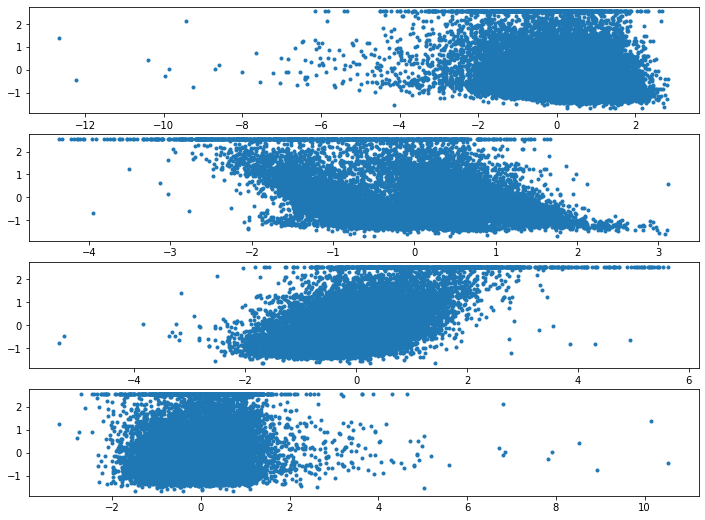

In [17]:
# 1D plot of the function to regress along the main eigenvector axes.
plt.clf
k=p
plt.rcParams["figure.figsize"] = (12,9)
for i in np.arange(0,k):
    plt.subplot(k,1,i+1)
    plt.plot(Ar[:,i], y, '.')
    plt.axis('tight')

Before going further, I'm going to apply dimensionality reduction

In [18]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

In [19]:
# pca = PCA(n_components=0.9)
# A_pca = pca.fit_transform(A)
# # print(A_pca)
# A = A_pca

# A1_pca = pca.fit_transform(A1)
# # print(A1_pca)
# A1 = A1_pca

# p=p//2


Now we go on again.

Nothing happened so far yet.

In [20]:
#Compute least squares solution
x = np.linalg.solve( A.transpose().dot(A), A.transpose().dot(y) )

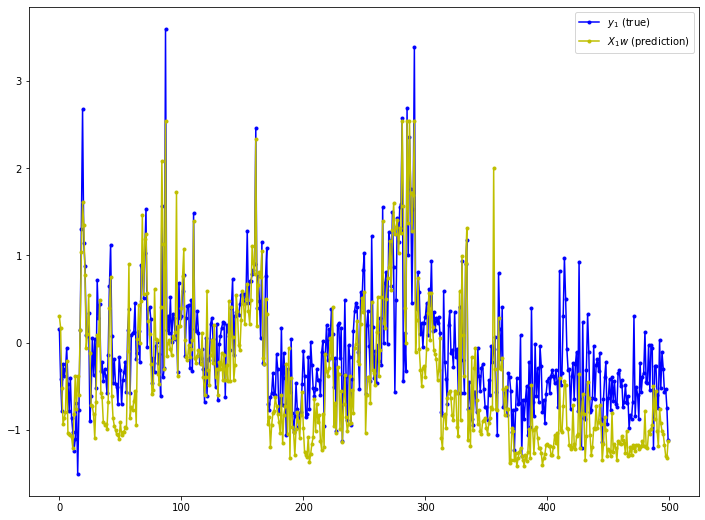

In [21]:
plt.clf
plt.rcParams["figure.figsize"] = (12,9)
plt.plot( A1.dot(x)[0:500], 'b.-' )
plt.plot( y1[0:500], 'y.-' )
plt.axis('tight')
plt.legend(('$y_1$ (true)', '$X_1 w$ (prediction)'));



In [22]:
E = np.linalg.norm(A1.dot(x)-y1) / np.linalg.norm(y1)
print(( 'Relative prediction error: ' + str(E) ) )

Relative prediction error: 0.699005727385572


In [23]:
def f(x): return 1/2*np.linalg.norm(A.dot(x)-y)**2
def Gradf(x): return A.transpose().dot(A.dot(x)-y)

In [24]:
tau = 2/np.linalg.norm(A,2)
x = np.zeros((p,1))
x = x - tau*Gradf(x)
tau_mult = [.1, .5, 1, 1.8]

C:\Users\norti\AppData\Local\Temp\ipykernel_22492\3733031343.py:21: RuntimeWarning: invalid value encountered in log10
  e = np.log10( flist-f(xopt) +1e-20)
C:\Users\norti\AppData\Local\Temp\ipykernel_22492\3733031343.py:21: RuntimeWarning: invalid value encountered in log10
  e = np.log10( flist-f(xopt) +1e-20)
C:\Users\norti\AppData\Local\Temp\ipykernel_22492\3733031343.py:21: RuntimeWarning: invalid value encountered in log10
  e = np.log10( flist-f(xopt) +1e-20)


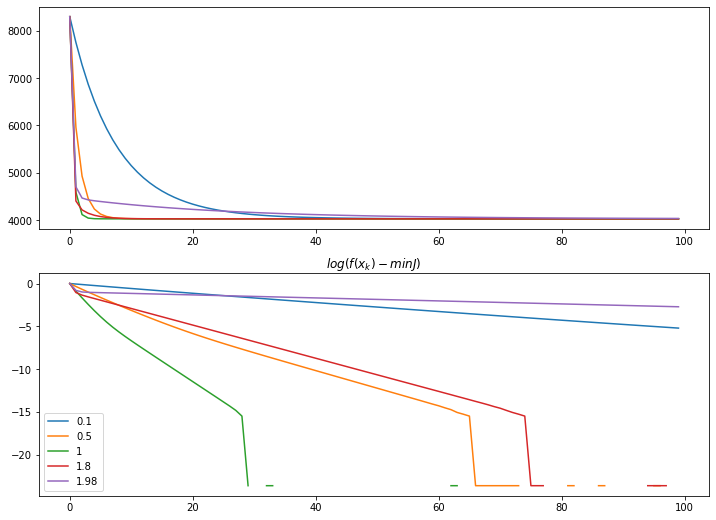

In [25]:
niter = 100
flist = np.zeros((niter,1))

tau_mult = [.1, .5, 1, 1.8, 1.98];

xopt = np.linalg.solve( A.transpose().dot(A), A.transpose().dot(y) )
plt.clf

fig, (ax1, ax2) = plt.subplots(2, 1)
for itau in np.arange(0,5):
    tau = tau_mult[itau]/np.linalg.norm(A,2)**2
    x = np.zeros((p,1))
    for i in np.arange(0,niter):
        flist[i] = f(x)
        x = x - tau*Gradf(x)
    #plt.subplot(2,1,1)
    ax1.plot(flist)
    ax1.axis('tight')
    plt.title('f(x_k)')
    #plt.subplot(2,1,2)
    e = np.log10( flist-f(xopt) +1e-20)
    ax2.plot(e-e[0], label=str(tau_mult[itau]))
    ax2.axis('tight')
    leg = ax2.legend()
    #ax2.legend( str( tau_mult[itau] ) )
    plt.title('$log(f(x_k)-min J)$')

In [26]:
C = A.transpose().dot(A)
tau_opt = 2 / ( np.linalg.norm(C,2) + np.linalg.norm(C,-2) )
print(( 'Optimal tau = ' + str( tau_opt * np.linalg.norm(A,2)**2 ) ) + ' / |AA^T|' );

Optimal tau = 1.4073000121513224 / |AA^T|


RIDGE

In [27]:
Lambda = .2*np.linalg.norm(A)**2;
x = np.linalg.solve( A.transpose().dot(A) + Lambda*np.eye(p), A.transpose().dot(y) )
u = np.linalg.solve( A.dot(A.transpose()) + Lambda*np.eye(n), y )
x1 = A.transpose().dot( u )
print( ('Error (should be 0): ' + str( np.linalg.norm(x-x1)/np.linalg.norm(x) ) ) )

Error (should be 0): 3.496506823955858e-16


(-0.011, 0.011, 0.6987957318038738, 0.7004610740534418)

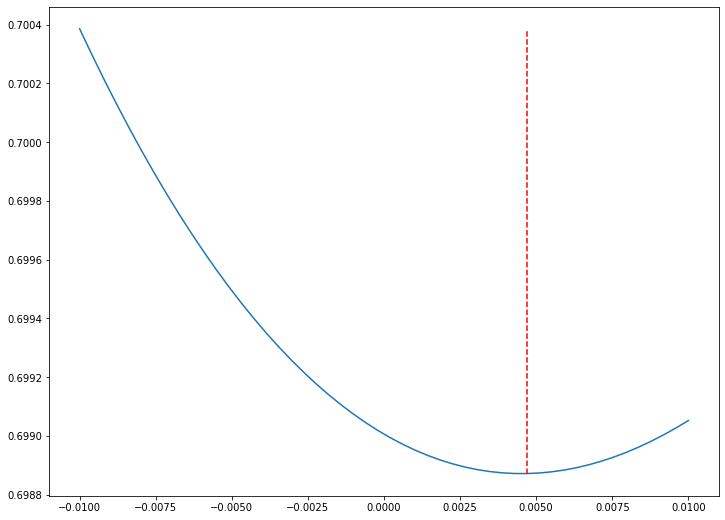

In [28]:
q = 50
l = np.linspace(start=-0.01, stop=0.01, num=q)
Xiter = np.zeros( (p,q) )
E = np.zeros(len(l))
for i in range(len(l)):
    Lambda = l[i]*np.linalg.norm(A)**2
    x = np.linalg.solve( A.transpose().dot(A) + Lambda*np.eye(p), A.transpose().dot(y) )
    Xiter[:, i] = x.flatten()
    E[i] = np.linalg.norm(A1.dot(x) - y1)/np.linalg.norm(y1)

plt.plot(l, E, '-')

i = E.argmin()
lambda0 = l[i]
plt.plot([lambda0, lambda0],[E.min(), E.max()], 'r--')
plt.axis('tight')


In [ ]:
plt.clf
for i in np.arange(0,p):
    plt.plot(l, Xiter[i,:], label=headers[i])
plt.plot( [lambda0,lambda0], [Xiter.flatten().min(), Xiter.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X|^2$')
plt.ylabel('$x_i$')
plt.legend()